# Setup

In [15]:
# import your standard packages
%run ../../global_tools/start.py

# import your local functions
from local_functions import *

# make sure the figures plot inline rather than at the end
%matplotlib inline

Default libraries loaded.


# Paths and Parameters

In [16]:
bounds_AS = [68,79,3,20]
bounds_wBoB = [79,87,2,21]
bounds_BoB = [87,100,0,23]

# bounds_AS = [68,79,3,20]
# bounds_SL = [79,87,3,10]
# bounds_wBoB = [79,87,10,21]
# bounds_BoB = [87,100,0,23]

# Read Data

In [17]:
# SLA
ds_SLA = xr.open_dataset('../data/sla_to_woa.nc')
ds_SLA


<xarray.Dataset>
Dimensions:           (lat: 35, lon: 55, month: 12, time: 329)
Coordinates:
  * time              (time) datetime64[ns] 1993-01-01 1993-02-01 ... 2020-05-01
  * lon               (lon) float32 48.5 49.5 50.5 51.5 ... 100.5 101.5 102.5
  * lat               (lat) float32 -1.5 -0.5 0.5 1.5 ... 29.5 30.5 31.5 32.5
  * month             (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    mon_sla_mon_anom  (time, lat, lon) float64 ...
    mon_sla_mon_clim  (month, lat, lon) float64 ...

In [18]:
# WOA
ds_WOA = xr.open_dataset('../data/woa_processed.nc')
ds_WOA

<xarray.Dataset>
Dimensions:                      (coastal_loc: 1925, coastal_pos: 439, depth: 57, lat: 35, lon: 55, lonmin,lonmax,latmin,latmax: 4, month: 12)
Coordinates:
  * month                        (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
  * depth                        (depth) float32 0.0 5.0 10.0 ... 1450.0 1500.0
  * lon                          (lon) float32 48.5 49.5 50.5 ... 101.5 102.5
  * lat                          (lat) float32 -1.5 -0.5 0.5 ... 30.5 31.5 32.5
  * coastal_loc                  (coastal_loc) int64 0 1 2 3 ... 1922 1923 1924
  * coastal_pos                  (coastal_pos) int64 0 1 2 3 ... 435 436 437 438
  * lonmin,lonmax,latmin,latmax  (lonmin,lonmax,latmin,latmax) int64 0 1 2 3
Data variables:
    temp                         (month, depth, lat, lon) float64 ...
    psal                         (month, depth, lat, lon) float64 ...
    doxy                         (month, depth, lat, lon) float64 ...
    nitrate                      (month, depth, lat

# Whole Indian Ocean Scatterplots

Text(0, 0.5, 'temp')

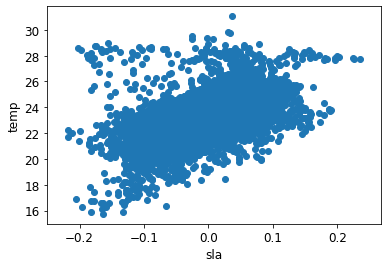

In [19]:
sla = ds_SLA.mon_sla_mon_clim.stack(allpoints=['month','lat','lon'])
temp = ds_WOA.temp_50_200.stack(allpoints=['month','lat','lon'])
doxy = ds_WOA.doxy_50_200.stack(allpoints=['month','lat','lon'])
nitrate = ds_WOA.nitrate_50_200.stack(allpoints=['month','lat','lon'])

plt.scatter(sla,temp)
plt.xlabel('sla')
plt.ylabel('temp')
# plt.ylim([0,150])

Text(0, 0.5, 'doxy')

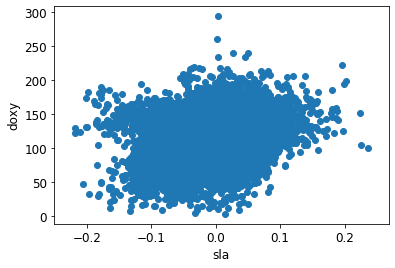

In [20]:
plt.scatter(sla,doxy)
plt.xlabel('sla')
plt.ylabel('doxy')

Text(0, 0.5, 'nitrate')

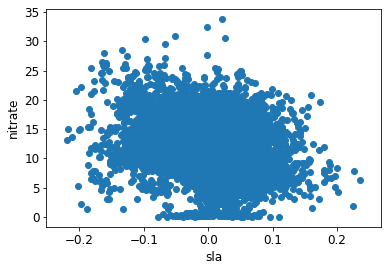

In [21]:
plt.scatter(sla,nitrate)
plt.xlabel('sla')
plt.ylabel('nitrate')

# Subset for AS and BoB

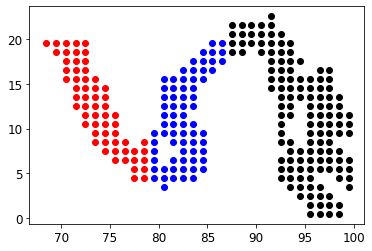

In [22]:
#----------------- Arabian Sea ---------------------#

lat_slice_AS = slice(bounds_AS[2],bounds_AS[3]) 
lon_slice_AS = slice(bounds_AS[0],bounds_AS[1]) 

#subset gridded data
temp_AS = ds_WOA.temp_50_200.sel(lat = lat_slice_AS, lon = lon_slice_AS)
doxy_AS = ds_WOA.doxy_50_200.sel(lat = lat_slice_AS, lon = lon_slice_AS)
sla_AS = ds_SLA.mon_sla_mon_clim.sel(lat = lat_slice_AS, lon = lon_slice_AS)

# convert to coastal
xx,yy = np.meshgrid(np.array(temp_AS.lon),np.array(temp_AS.lat))
xx_AS = xx.flatten()
yy_AS = yy.flatten()

mask_AS = mask_coast(xx_AS,yy_AS,np.array(ds_WOA.coastal_mask_bounds))
temp_AS = temp_AS.stack(allpoints=['lat','lon'])[:,mask_AS]
doxy_AS = doxy_AS.stack(allpoints=['lat','lon'])[:,mask_AS]
sla_AS = sla_AS.stack(allpoints=['lat','lon'])[:,mask_AS]
xx_AS = xx_AS[mask_AS]
yy_AS = yy_AS[mask_AS]

mon_AS = np.full(temp_AS.shape,np.nan)
for tt in range(1,13):
    mon_AS[tt-1,:] = np.ones([1,temp_AS.shape[1]])*tt
    
temp_AS = np.array(temp_AS).flatten()
doxy_AS = np.array(doxy_AS).flatten()
sla_AS = np.array(sla_AS).flatten()
mon_AS = mon_AS.flatten()

sla_AS = sla_AS[~np.isnan(temp_AS)]
doxy_AS = doxy_AS[~np.isnan(temp_AS)]
mon_AS = mon_AS[~np.isnan(temp_AS)]
temp_AS = temp_AS[~np.isnan(temp_AS)]

#----------------- Sri Lanka ---------------------#

# lat_slice_SL = slice(bounds_SL[2],bounds_SL[3]) 
# lon_slice_SL = slice(bounds_SL[0],bounds_SL[1]) 

# #subset gridded data
# temp_SL = ds_WOA.temp_50_200.sel(lat = lat_slice_SL, lon = lon_slice_SL)
# doxy_SL = ds_WOA.doxy_50_200.sel(lat = lat_slice_SL, lon = lon_slice_SL)
# sla_SL = ds_SLA.mon_sla_mon_clim.sel(lat = lat_slice_SL, lon = lon_slice_SL)

# # convert to coastal
# xx,yy = np.meshgrid(np.array(temp_SL.lon),np.array(temp_SL.lat))
# xx_SL = xx.flatten()
# yy_SL = yy.flatten()

# mask_SL = mask_coast(xx_SL,yy_SL,np.array(ds_WOA.coastal_mask_bounds))
# temp_SL = temp_SL.stack(allpoints=['lat','lon'])[:,mask_SL]
# doxy_SL = doxy_SL.stack(allpoints=['lat','lon'])[:,mask_SL]
# sla_SL = sla_SL.stack(allpoints=['lat','lon'])[:,mask_SL]
# xx_SL = xx_SL[mask_SL]
# yy_SL = yy_SL[mask_SL]

# mon_SL = np.full(temp_SL.shape,np.nan)
# for tt in range(1,13):
#     mon_SL[tt-1,:] = np.ones([1,temp_SL.shape[1]])*tt
    
# temp_SL = np.array(temp_SL).flatten()
# doxy_SL = np.array(doxy_SL).flatten()
# sla_SL = np.array(sla_SL).flatten()
# mon_SL = mon_SL.flatten()

# sla_SL = sla_SL[~np.isnan(temp_SL)]
# doxy_SL = doxy_SL[~np.isnan(temp_SL)]
# mon_SL = mon_SL[~np.isnan(temp_SL)]
# temp_SL = temp_SL[~np.isnan(temp_SL)]

#---------------- Western Bay of Bengal --------------------#

lat_slice_wBoB = slice(bounds_wBoB[2],bounds_wBoB[3])
lon_slice_wBoB = slice(bounds_wBoB[0],bounds_wBoB[1])

#subset gridded data
temp_wBoB = ds_WOA.temp_50_200.sel(lat = lat_slice_wBoB, lon = lon_slice_wBoB)
doxy_wBoB = ds_WOA.doxy_50_200.sel(lat = lat_slice_wBoB, lon = lon_slice_wBoB)
sla_wBoB = ds_SLA.mon_sla_mon_clim.sel(lat = lat_slice_wBoB, lon = lon_slice_wBoB)

# convert to coastal
xx,yy = np.meshgrid(np.array(temp_wBoB.lon),np.array(temp_wBoB.lat))
xx_wBoB = xx.flatten()
yy_wBoB = yy.flatten()

mask_wBoB = mask_coast(xx_wBoB,yy_wBoB,np.array(ds_WOA.coastal_mask_bounds))
temp_wBoB = temp_wBoB.stack(allpoints=['lat','lon'])[:,mask_wBoB]
doxy_wBoB = doxy_wBoB.stack(allpoints=['lat','lon'])[:,mask_wBoB]
sla_wBoB = sla_wBoB.stack(allpoints=['lat','lon'])[:,mask_wBoB]
xx_wBoB = xx_wBoB[mask_wBoB]
yy_wBoB = yy_wBoB[mask_wBoB]

mon_wBoB = np.full(temp_wBoB.shape,np.nan)
for tt in range(1,13):
    mon_wBoB[tt-1,:] = np.ones([1,temp_wBoB.shape[1]])*tt

# fig, axes = plt.subplots(nrows = 1, ncols = 1,figsize=(4,6),dpi=200)
    
# plt.scatter(xx_BoB,yy_BoB, c = tcp_BoB[0,:])
    
temp_wBoB = np.array(temp_wBoB).flatten()
doxy_wBoB = np.array(doxy_wBoB).flatten()
sla_wBoB = np.array(sla_wBoB).flatten()
mon_wBoB = mon_wBoB.flatten()

sla_wBoB = sla_wBoB[~np.isnan(temp_wBoB)]
doxy_wBoB = doxy_wBoB[~np.isnan(temp_wBoB)]
mon_wBoB = mon_wBoB[~np.isnan(temp_wBoB)]
temp_wBoB = temp_wBoB[~np.isnan(temp_wBoB)]


#---------------- Bay of Bengal --------------------#

lat_slice_BoB = slice(bounds_BoB[2],bounds_BoB[3])
lon_slice_BoB = slice(bounds_BoB[0],bounds_BoB[1])

#subset gridded data
temp_BoB = ds_WOA.temp_50_200.sel(lat = lat_slice_BoB, lon = lon_slice_BoB)
doxy_BoB = ds_WOA.doxy_50_200.sel(lat = lat_slice_BoB, lon = lon_slice_BoB)
sla_BoB = ds_SLA.mon_sla_mon_clim.sel(lat = lat_slice_BoB, lon = lon_slice_BoB)

# convert to coastal
xx,yy = np.meshgrid(np.array(temp_BoB.lon),np.array(temp_BoB.lat))
xx_BoB = xx.flatten()
yy_BoB = yy.flatten()

mask_BoB = mask_coast(xx_BoB,yy_BoB,np.array(ds_WOA.coastal_mask_bounds))
temp_BoB = temp_BoB.stack(allpoints=['lat','lon'])[:,mask_BoB]
doxy_BoB = doxy_BoB.stack(allpoints=['lat','lon'])[:,mask_BoB]
sla_BoB = sla_BoB.stack(allpoints=['lat','lon'])[:,mask_BoB]
xx_BoB = xx_BoB[mask_BoB]
yy_BoB = yy_BoB[mask_BoB]

mon_BoB = np.full(temp_BoB.shape,np.nan)
seas_BoB = np.full(temp_BoB.shape,np.nan)
seas_clrs_BoB = np.full(temp_BoB.shape,np.nan)

for tt in range(1,13):
    
    mon_BoB[tt-1,:] = np.ones([1,temp_BoB.shape[1]])*tt
    
    if (tt == 6) | (tt == 7) | (tt == 8) | (tt == 9) | (tt == 10) | (tt == 11):
        seas_BoB[tt-1,:] = np.zeros([1,temp_BoB.shape[1]])
        
    elif (tt == 12) | (tt == 1) | (tt == 2) | (tt == 3) | (tt == 4) | (tt == 5):
        seas_BoB[tt-1,:] = np.ones([1,temp_BoB.shape[1]])
        
    
temp_BoB = np.array(temp_BoB).flatten()
doxy_BoB = np.array(doxy_BoB).flatten()
sla_BoB = np.array(sla_BoB).flatten()
mon_BoB = mon_BoB.flatten()
seas_BoB = seas_BoB.flatten()

sla_BoB = sla_BoB[~np.isnan(temp_BoB)]
doxy_BoB = doxy_BoB[~np.isnan(temp_BoB)]
mon_BoB = mon_BoB[~np.isnan(temp_BoB)]
seas_BoB = seas_BoB[~np.isnan(temp_BoB)]
temp_BoB = temp_BoB[~np.isnan(temp_BoB)]

plt.scatter(xx_BoB,yy_BoB,color = 'k')
plt.scatter(xx_wBoB,yy_wBoB,color = 'b')
plt.scatter(xx_AS,yy_AS,color = 'r')
# plt.scatter(xx_SL,yy_SL,color = 'g')

In [23]:
# # add AS and SL together
# temp_AS = np.concatenate((temp_AS,temp_SL))
# doxy_AS = np.concatenate((doxy_AS,doxy_SL))
# sla_AS = np.concatenate((sla_AS,sla_SL))
# mon_AS = np.concatenate((mon_AS,mon_SL))
# xx_AS = np.concatenate((xx_AS,xx_SL))
# yy_AS = np.concatenate((yy_AS,yy_SL))

# plt.scatter(xx_BoB,yy_BoB,color = 'k')
# plt.scatter(xx_wBoB,yy_wBoB,color = 'b')
# plt.scatter(xx_AS,yy_AS)

# Find correlations

In [24]:
slope_sla_temp, intercept_sla_temp, r_value_sla_temp, p_value_sla_temp,_ = seasonal_space_correlate(ds_SLA.mon_sla_mon_clim,
                                                                                                                   ds_WOA.temp_50_200)

slope_sla_doxy, intercept_sla_doxy, r_value_sla_doxy, p_value_sla_doxy,_ = seasonal_space_correlate(ds_SLA.mon_sla_mon_clim,
                                                                                                                    ds_WOA.doxy_50_200)

100%|██████████| 1925/1925 [00:06<00:00, 279.27it/s]


# Find Solubility

In [25]:
# O2_sat_AS = o2sat(temp_AS,psal_AS)
# O2_sat_wBoB = o2sat(temp_wBoB,psal_wBoB)
# O2_sat_BoB = o2sat(temp_BoB,psal_BoB)

# O2_anom_AS = O2_sat_AS
# O2_anom_wBoB = doxy_wBoB - O2_sat_wBoB
# O2_anom_BoB = doxy_BoB - O2_sat_BoB

# Joint Plot

/home/jennap/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:79: RuntimeWarning: invalid value encountered in greater_equal
/home/jennap/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:148: RuntimeWarning: invalid value encountered in greater_equal


min temp/sla r val:  0.0459358240968915
max temp/sla r val:  0.9933466070069856
min temp/doxy r val:  0.0045264829877020496
max temp/doxy r val:  0.9552485097482475


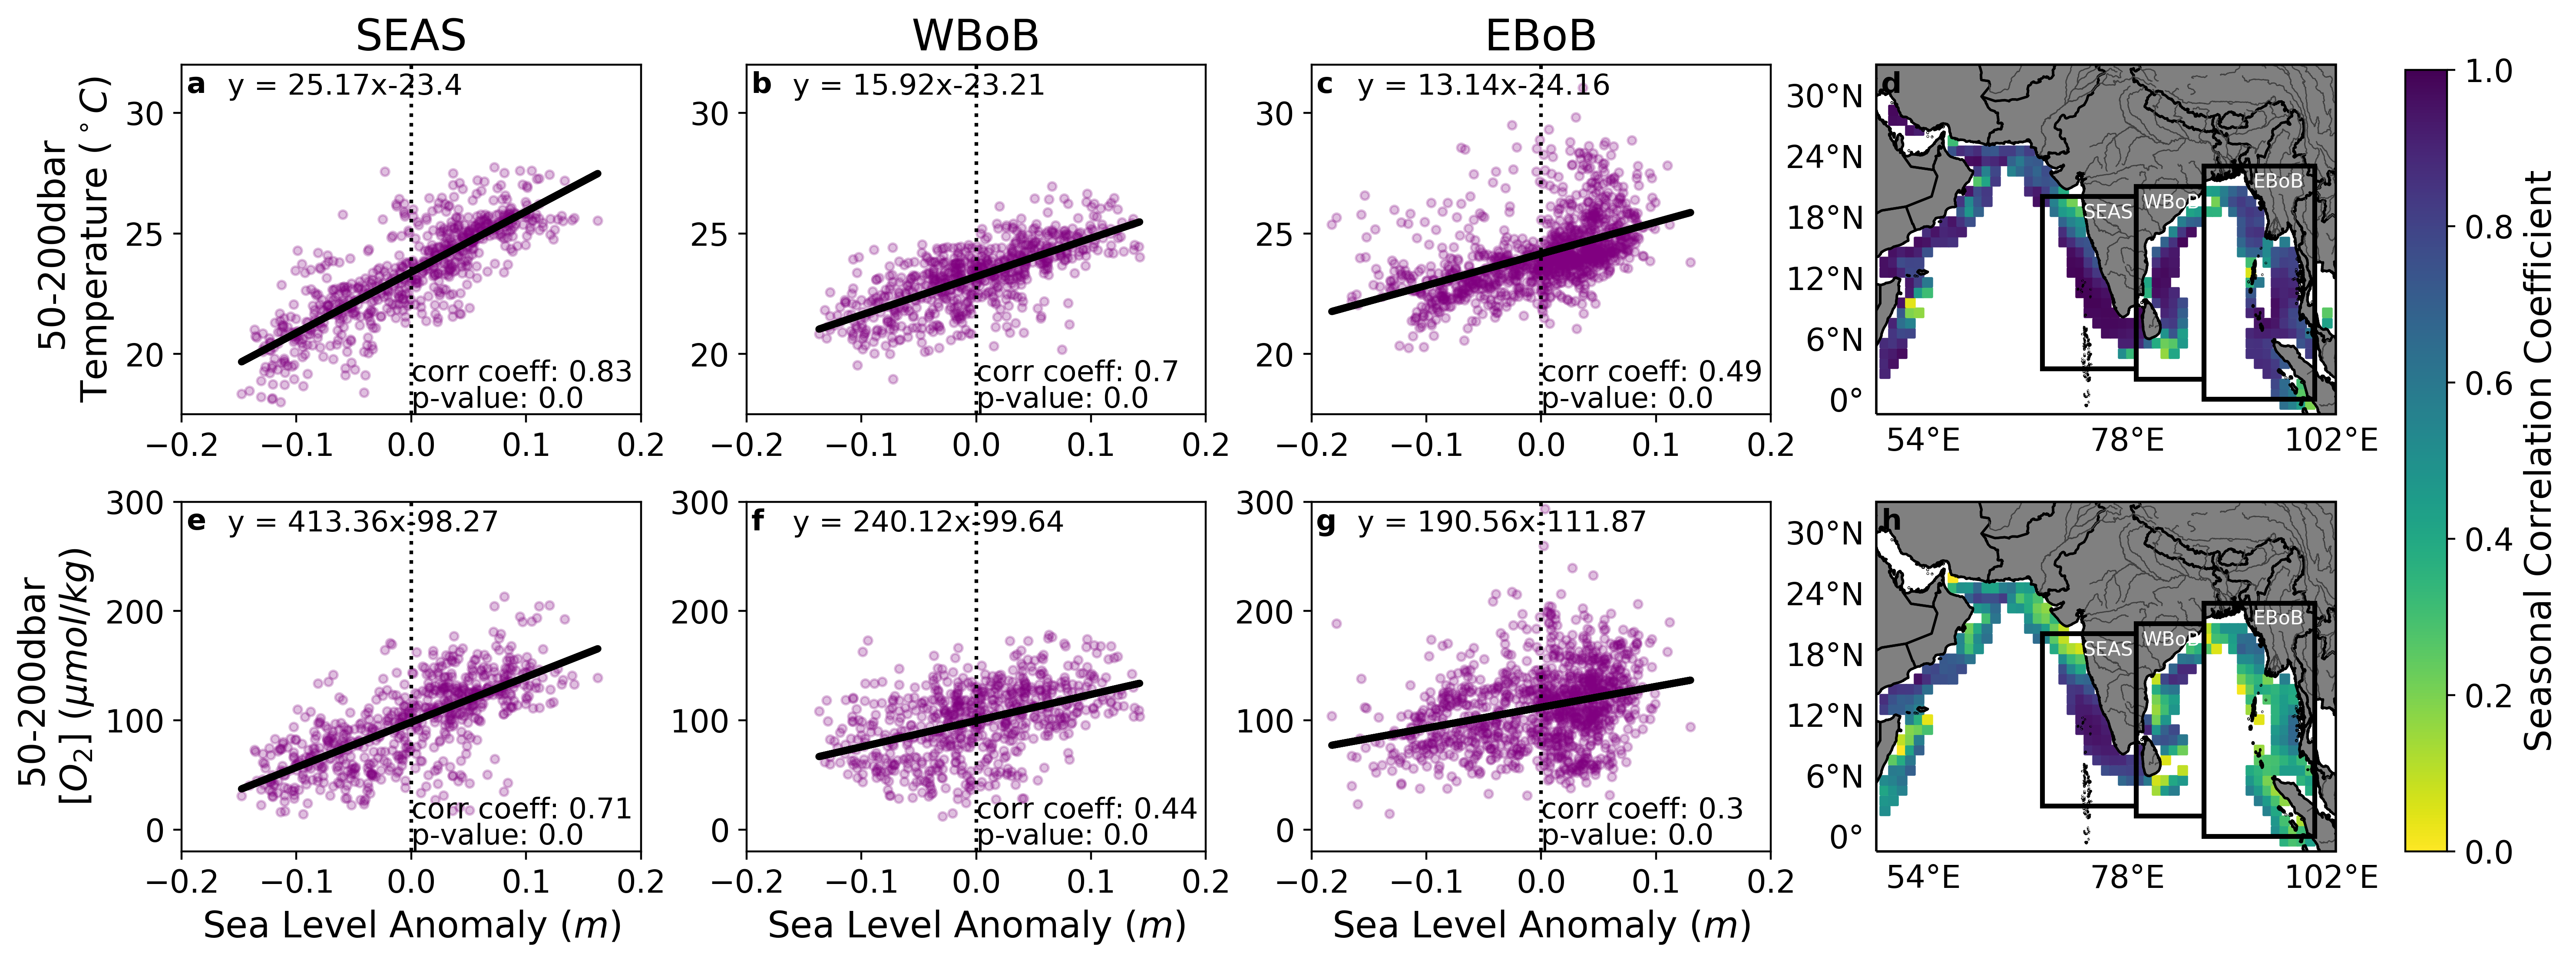

In [26]:
fig = plt.figure(figsize=(16,6),dpi=400)

sz = 12
sq_sz = 60
fsz = 12
alpha = 0.25

cmin = 0
cmax = 1

# cmap = get_continuous_cmap(['#034f84','#92a8d1','#b7d7e8','#f0f0f0','#f7cac9','#f7786b','#c94c4c'])
cmap = plt.cm.viridis_r

sp_clr = 'purple'
sat_clr = 'lightgrey'

params = {'legend.fontsize': 14,
         'axes.labelsize': 15,
         'axes.titlesize': 18,
         'xtick.labelsize':13,
         'ytick.labelsize':13}

pylab.rcParams.update(params)

##############################################################

xlim = [-0.2,0.2]
ylim = [17.5,32]

ax = fig.add_subplot(241)
p = ax.scatter(sla_AS,temp_AS,c = sp_clr,s= sz,alpha = alpha)
ax.axvline(x=0,color = 'k',linestyle = ':')
m, b, r, p_val,_ = stats.linregress(sla_AS,temp_AS)
ax.plot(sla_AS, m*sla_AS + b, 'k', linewidth = 3)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_title('SEAS')
ax.set_ylabel('50-200dbar \nTemperature ($^\circ C$)')
add_letter(ax, 'a', x = 0.01,y=0.92)
add_text(ax, 'y = ' + str(np.round(m,2)) + 'x-' + str(np.round(np.abs(b),2)), x = 0.1,y=0.915, fontsize = fsz)
add_text(ax, 'corr coeff: ' + str(np.round(r,2)), x = 0.5,y=0.095, fontsize = fsz)
add_text(ax, 'p-value: ' + str(np.round(p_val,4)), x = 0.5,y=0.02, fontsize = fsz)


ax = fig.add_subplot(242)
p = ax.scatter(sla_wBoB,temp_wBoB,c = sp_clr,s= sz,alpha = alpha)
ax.axvline(x=0,color = 'k',linestyle = ':')
m, b, r, p_val,_ =stats.linregress(sla_wBoB,temp_wBoB)
ax.plot(sla_wBoB, m*sla_wBoB + b, 'k', linewidth = 3)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_title('WBoB')
ax.tick_params(axis='x',labelbottom='off')
ax.tick_params(axis='y',labelbottom='off')
add_letter(ax, 'b', x = 0.01,y=0.92)
add_text(ax, 'y = ' + str(np.round(m,2)) + 'x-' + str(np.round(np.abs(b),2)), x = 0.1,y=0.915, fontsize = fsz)
add_text(ax, 'corr coeff: ' + str(np.round(r,2)), x = 0.5,y=0.095, fontsize = fsz)
add_text(ax, 'p-value: ' + str(np.round(p_val,4)), x = 0.5,y=0.02, fontsize = fsz)


ax = fig.add_subplot(243)
p = ax.scatter(sla_BoB,temp_BoB,c = sp_clr,s= sz,alpha = alpha)
ax.axvline(x=0,color = 'k',linestyle = ':')
m, b, r, p_val,_ =stats.linregress(sla_BoB,temp_BoB)
ax.plot(sla_BoB, m*sla_BoB + b, 'k', linewidth = 3)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_title('EBoB')
ax.tick_params(axis='x',labelbottom='off')
ax.tick_params(axis='y',labelbottom='off')
add_letter(ax, 'c', x = 0.01,y=0.92)
add_text(ax, 'y = ' + str(np.round(m,2)) + 'x-' + str(np.round(np.abs(b),2)), x = 0.1,y=0.915, fontsize = fsz)
add_text(ax, 'corr coeff: ' + str(np.round(r,2)), x = 0.5,y=0.095, fontsize = fsz)
add_text(ax, 'p-value: ' + str(np.round(p_val,4)), x = 0.5,y=0.02, fontsize = fsz)


ax = fig.add_subplot(244,projection= ccrs.PlateCarree())
var = r_value_sla_temp.flatten()[ds_WOA.coastal_mask]
rm_mask = var >= 0
p = ax.scatter(ds_WOA.coastal_mask_xx[rm_mask],ds_WOA.coastal_mask_yy[rm_mask],c = var[rm_mask],
           marker='s',s= sz,cmap=cmap,vmin=cmin,vmax=cmax,transform=ccrs.PlateCarree())
g = add_land(ax, countries = True, rivers = True)
g.xlocator = mticker.FixedLocator([54,78,102])
g.xlabel_style = {'size': 13}
g.ylabel_style = {'size': 13}
add_letter(ax, 'd', x = 0.01,y=0.92)
box_bounds = [bounds_AS,
         bounds_wBoB,
         bounds_BoB]  #lonmin,lonmax, latmin, latmax 
clrs = ['k','k','k']
add_box(ax,box_bounds,clrs)
add_text(ax, 'SEAS', x = 0.45,y=0.56, fontsize = 8, color = 'w')
add_text(ax, 'WBoB', x = 0.58,y=0.59, fontsize = 8, color = 'w')
add_text(ax, 'EBoB', x = 0.82,y=0.65, fontsize = 8, color = 'w')

# max and mins 
print('min temp/sla r val: ', np.nanmin(var[rm_mask]))
print('max temp/sla r val: ', np.nanmax(var[rm_mask]))

#-------------------------------------------------------------
xlim = [-0.2,0.2]
ylim = [-20,300]

ax = fig.add_subplot(245)
ax.scatter(sla_AS,doxy_AS,c = sp_clr,s= sz,alpha = alpha)
ax.axvline(x=0,color = 'k',linestyle = ':')
m, b, r, p_val,_ =stats.linregress(sla_AS, doxy_AS)
ax.plot(sla_AS, m*sla_AS + b, 'k', linewidth = 3)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_ylabel('50-200dbar \n[$O_2$] ($\mu mol/ kg$)')
ax.set_xlabel('Sea Level Anomaly ($m$)')
add_letter(ax, 'e', x = 0.01,y=0.92)
add_text(ax, 'y = ' + str(np.round(m,2)) + 'x-' + str(np.round(np.abs(b),2)), x = 0.1,y=0.915, fontsize = fsz)
add_text(ax, 'corr coeff: ' + str(np.round(r,2)), x = 0.5,y=0.095, fontsize = fsz)
add_text(ax, 'p-value: ' + str(np.round(p_val,4)), x = 0.5,y=0.02, fontsize = fsz)


ax = fig.add_subplot(246)
ax.scatter(sla_wBoB,doxy_wBoB,c = sp_clr,s= sz,alpha = alpha)
ax.axvline(x=0,color = 'k',linestyle = ':')
m, b, r, p_val,_ =stats.linregress(sla_wBoB, doxy_wBoB)
ax.plot(sla_wBoB, m*sla_wBoB + b, 'k', linewidth = 3)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_xlabel('Sea Level Anomaly ($m$)')
add_letter(ax, 'f', x = 0.01,y=0.92)
add_text(ax, 'y = ' + str(np.round(m,2)) + 'x-' + str(np.round(np.abs(b),2)), x = 0.1,y=0.915, fontsize = fsz)
add_text(ax, 'corr coeff: ' + str(np.round(r,2)), x = 0.5,y=0.095, fontsize = fsz)
add_text(ax, 'p-value: ' + str(np.round(p_val,4)), x = 0.5,y=0.02, fontsize = fsz)


ax = fig.add_subplot(247)
ax.scatter(sla_BoB,doxy_BoB,c = sp_clr,s= sz,alpha = alpha)
ax.axvline(x=0,color = 'k',linestyle = ':')
m, b, r, p_val,_ =stats.linregress(sla_BoB, doxy_BoB)
ax.plot(sla_BoB, m*sla_BoB + b, 'k', linewidth = 3)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_xlabel('Sea Level Anomaly ($m$)')
add_letter(ax, 'g', x = 0.01,y=0.92)
add_text(ax, 'y = ' + str(np.round(m,2)) + 'x-' + str(np.round(np.abs(b),2)), x = 0.1,y=0.915, fontsize = fsz)
add_text(ax, 'corr coeff: ' + str(np.round(r,2)), x = 0.5,y=0.095, fontsize = fsz)
add_text(ax, 'p-value: ' + str(np.round(p_val,4)), x = 0.5,y=0.02, fontsize = fsz)

ax = fig.add_subplot(248,projection= ccrs.PlateCarree())
var = r_value_sla_doxy.flatten()[ds_WOA.coastal_mask]
rm_mask = var >= 0
p = ax.scatter(ds_WOA.coastal_mask_xx[rm_mask],ds_WOA.coastal_mask_yy[rm_mask],c = var[rm_mask],
           marker='s',s= sz,cmap=cmap,vmin=cmin,vmax=cmax,transform=ccrs.PlateCarree())
g = add_land(ax, countries = True, rivers = True)
g.xlocator = mticker.FixedLocator([54,78,102])
g.xlabel_style = {'size': 13}
g.ylabel_style = {'size': 13}
add_letter(ax, 'h', x = 0.01,y=0.92)
box_bounds = [bounds_AS,
         bounds_wBoB,
         bounds_BoB]  #lonmin,lonmax, latmin, latmax 
clrs = ['k','k','k']
add_box(ax,box_bounds,clrs)
add_text(ax, 'SEAS', x = 0.45,y=0.56, fontsize = 8, color = 'w')
add_text(ax, 'WBoB', x = 0.58,y=0.59, fontsize = 8, color = 'w')
add_text(ax, 'EBoB', x = 0.82,y=0.65, fontsize = 8, color = 'w')


# max and mins 
print('min temp/doxy r val: ', np.nanmin(var[rm_mask]))
print('max temp/doxy r val: ', np.nanmax(var[rm_mask]))


plt.subplots_adjust(hspace = 0.25, wspace = 0.23)

add_single_vert_cbar(fig,p,'Seasonal Correlation Coefficient')

 # SI

## Spatial maps of slope and p-value for correlations 50-200dbar

/home/jennap/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in greater_equal
/home/jennap/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:58: RuntimeWarning: invalid value encountered in greater_equal
/home/jennap/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:94: RuntimeWarning: invalid value encountered in greater_equal


min temp/sla p val:  1.0154170378783429e-10
max temp/sla p val:  0.9729828892440797
min doxy/sla p val:  1.3110432030658805e-06
max doxy/sla p val:  0.9888609125808864
min temp/sla slope:  0.680160050529517
max temp/sla slope:  51.058272437354745


/home/jennap/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:121: RuntimeWarning: invalid value encountered in greater_equal


min doxy/sla slope:  3.344203824376419
max doxy/sla slope:  1258.9782372178763


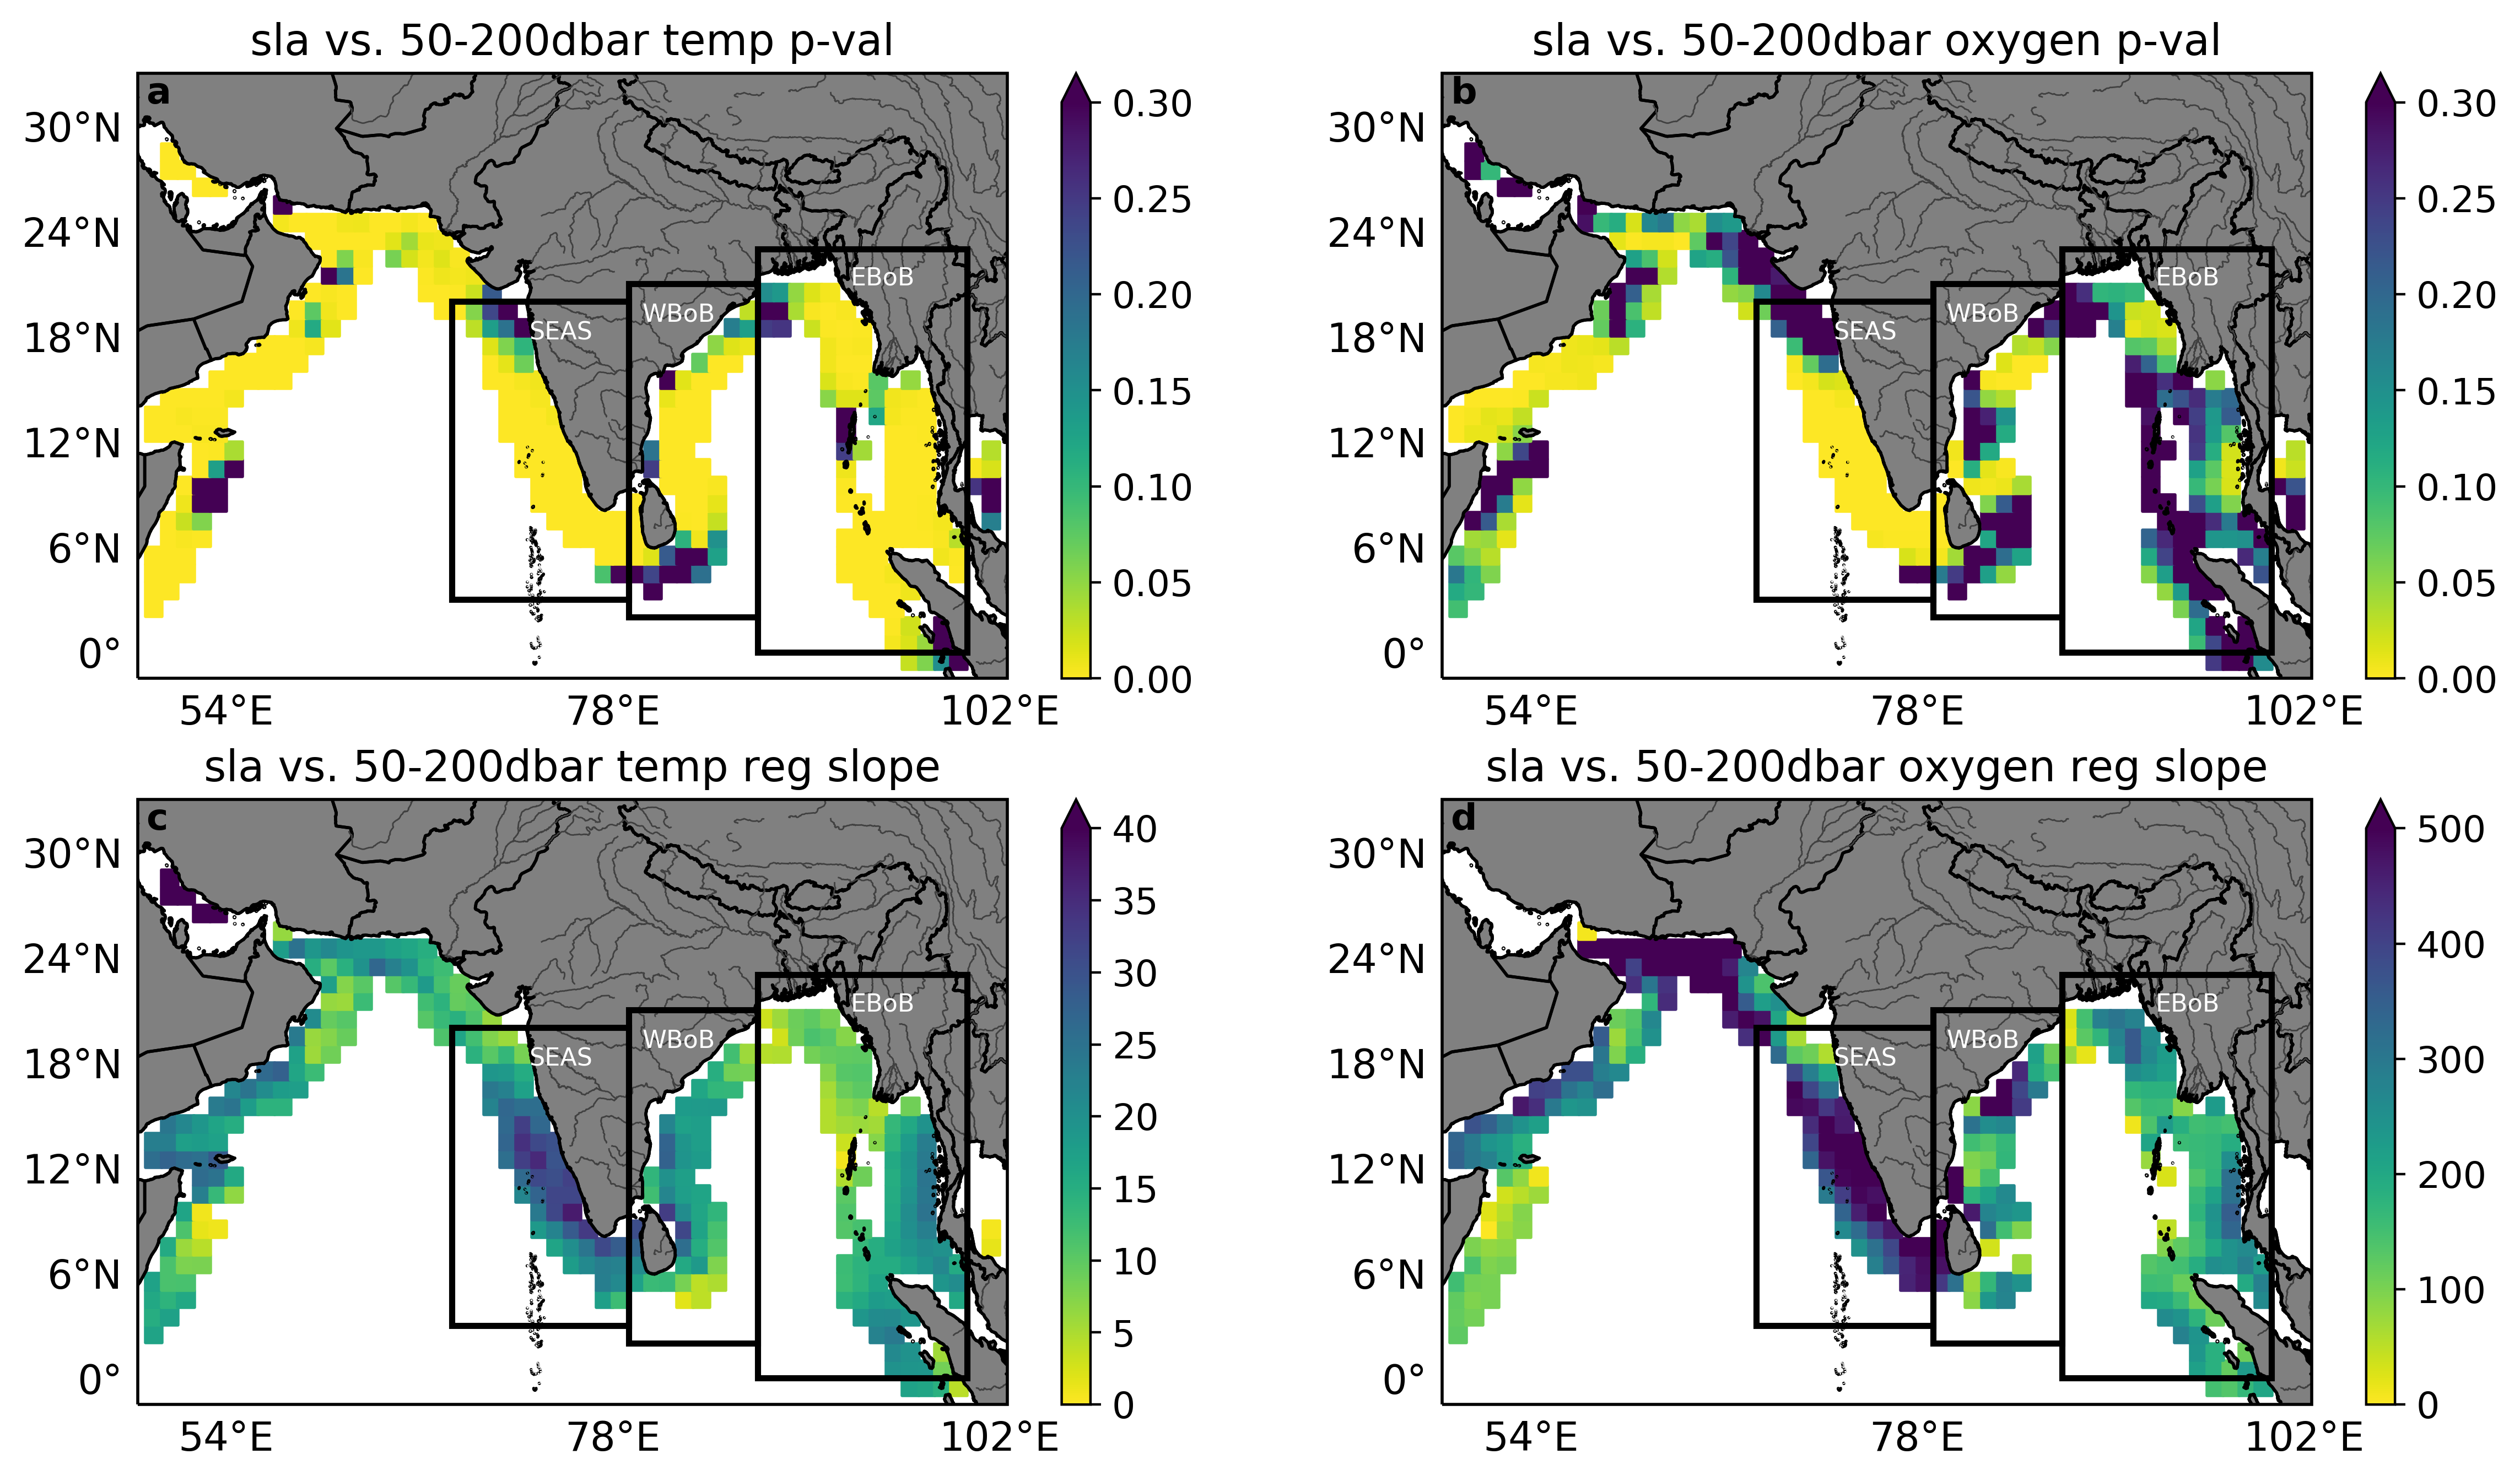

In [27]:
fig = plt.figure(figsize=(14,8),dpi=400)

sz = 30
fsz = 12
alpha = 0.25

# cmap = get_continuous_cmap(['#034f84','#92a8d1','#b7d7e8','#f0f0f0','#f7cac9','#f7786b','#c94c4c'])
cmap = plt.cm.viridis_r

sp_clr = 'purple'
sat_clr = 'lightgrey'

params = {'legend.fontsize': 12,
         'axes.labelsize': 12,
         'axes.titlesize': 14,
         'xtick.labelsize':12,
         'ytick.labelsize':12}

pylab.rcParams.update(params)



##############################################################
# P-Values

cmin = 0
cmax = 0.3

ax = fig.add_subplot(221,projection= ccrs.PlateCarree())
var = p_value_sla_temp.flatten()[ds_WOA.coastal_mask]
rm_mask = var >= 0
p = ax.scatter(ds_WOA.coastal_mask_xx[rm_mask],ds_WOA.coastal_mask_yy[rm_mask],c = var[rm_mask],
           marker='s',s= sz,cmap=cmap,vmin=cmin,vmax=cmax,transform=ccrs.PlateCarree())
plt.colorbar(p,ax=ax, extend = 'max')
g = add_land(ax, countries = True, rivers = True)
g.xlocator = mticker.FixedLocator([54,78,102])
g.xlabel_style = {'size': 13}
g.ylabel_style = {'size': 13}
add_letter(ax, 'a', x = 0.01,y=0.95)
ax.set_title('sla vs. 50-200dbar temp p-val')
box_bounds = [bounds_AS,
         bounds_wBoB,
         bounds_BoB]  #lonmin,lonmax, latmin, latmax 
clrs = ['k','k','k']
add_box(ax,box_bounds,clrs)
add_text(ax, 'SEAS', x = 0.45,y=0.56, fontsize = 8, color = 'w')
add_text(ax, 'WBoB', x = 0.58,y=0.59, fontsize = 8, color = 'w')
add_text(ax, 'EBoB', x = 0.82,y=0.65, fontsize = 8, color = 'w')

# max and mins 
print('min temp/sla p val: ', np.nanmin(var[rm_mask]))
print('max temp/sla p val: ', np.nanmax(var[rm_mask]))

#----------------------------------------------------------------------------

ax = fig.add_subplot(222,projection= ccrs.PlateCarree())
var = p_value_sla_doxy.flatten()[ds_WOA.coastal_mask]
rm_mask = var >= 0
p = ax.scatter(ds_WOA.coastal_mask_xx[rm_mask],ds_WOA.coastal_mask_yy[rm_mask],c = var[rm_mask],
           marker='s',s= sz,cmap=cmap,vmin=cmin,vmax=cmax,transform=ccrs.PlateCarree())
plt.colorbar(p,ax=ax, extend = 'max')
g = add_land(ax, countries = True, rivers = True)
g.xlocator = mticker.FixedLocator([54,78,102])
g.xlabel_style = {'size': 13}
g.ylabel_style = {'size': 13}
add_letter(ax, 'b', x = 0.01,y=0.95)
ax.set_title('sla vs. 50-200dbar oxygen p-val')
box_bounds = [bounds_AS,
         bounds_wBoB,
         bounds_BoB]  #lonmin,lonmax, latmin, latmax 
clrs = ['k','k','k']
add_box(ax,box_bounds,clrs)
add_text(ax, 'SEAS', x = 0.45,y=0.56, fontsize = 8, color = 'w')
add_text(ax, 'WBoB', x = 0.58,y=0.59, fontsize = 8, color = 'w')
add_text(ax, 'EBoB', x = 0.82,y=0.65, fontsize = 8, color = 'w')

# max and mins 
print('min doxy/sla p val: ', np.nanmin(var[rm_mask]))
print('max doxy/sla p val: ', np.nanmax(var[rm_mask]))

# add_single_vert_cbar(fig,p,'Seasonal \nP-value', loc = [0.925, 0.55, 0.015, 0.32])

#----------------------------------------------------------------------------
# Regression Slopes

cmin = 0
cmax = 40

cmin2 = 0
cmax2 = 500

ax = fig.add_subplot(223,projection= ccrs.PlateCarree())
var = slope_sla_temp.flatten()[ds_WOA.coastal_mask]
rm_mask = var >= 0
p = ax.scatter(ds_WOA.coastal_mask_xx[rm_mask],ds_WOA.coastal_mask_yy[rm_mask],c = var[rm_mask],
           marker='s',s= sz,cmap=cmap,vmin=cmin,vmax=cmax,transform=ccrs.PlateCarree())
plt.colorbar(p,ax=ax, extend = 'max')
g = add_land(ax, countries = True, rivers = True)
g.xlocator = mticker.FixedLocator([54,78,102])
g.xlabel_style = {'size': 13}
g.ylabel_style = {'size': 13}
add_letter(ax, 'c', x = 0.01,y=0.95)
ax.set_title('sla vs. 50-200dbar temp reg slope')
box_bounds = [bounds_AS,
         bounds_wBoB,
         bounds_BoB]  #lonmin,lonmax, latmin, latmax 
clrs = ['k','k','k']
add_box(ax,box_bounds,clrs)
add_text(ax, 'SEAS', x = 0.45,y=0.56, fontsize = 8, color = 'w')
add_text(ax, 'WBoB', x = 0.58,y=0.59, fontsize = 8, color = 'w')
add_text(ax, 'EBoB', x = 0.82,y=0.65, fontsize = 8, color = 'w')

# max and mins 
print('min temp/sla slope: ', np.nanmin(var[rm_mask]))
print('max temp/sla slope: ', np.nanmax(var[rm_mask]))

#----------------------------------------------------------------------------

ax = fig.add_subplot(224,projection= ccrs.PlateCarree())
var = slope_sla_doxy.flatten()[ds_WOA.coastal_mask]
rm_mask = var >= 0
p = ax.scatter(ds_WOA.coastal_mask_xx[rm_mask],ds_WOA.coastal_mask_yy[rm_mask],c = var[rm_mask],
           marker='s',s= sz,cmap=cmap,vmin=cmin2,vmax=cmax2,transform=ccrs.PlateCarree())
plt.colorbar(p,ax=ax, extend = 'max')
g = add_land(ax, countries = True, rivers = True)
g.xlocator = mticker.FixedLocator([54,78,102])
g.xlabel_style = {'size': 13}
g.ylabel_style = {'size': 13}
add_letter(ax, 'd', x = 0.01,y=0.95)
ax.set_title('sla vs. 50-200dbar oxygen reg slope')
box_bounds = [bounds_AS,
         bounds_wBoB,
         bounds_BoB]  #lonmin,lonmax, latmin, latmax 
clrs = ['k','k','k']
add_box(ax,box_bounds,clrs)
add_text(ax, 'SEAS', x = 0.45,y=0.56, fontsize = 8, color = 'w')
add_text(ax, 'WBoB', x = 0.58,y=0.59, fontsize = 8, color = 'w')
add_text(ax, 'EBoB', x = 0.82,y=0.65, fontsize = 8, color = 'w')

# max and mins 
print('min doxy/sla slope: ', np.nanmin(var[rm_mask]))
print('max doxy/sla slope: ', np.nanmax(var[rm_mask]))

# add_single_vert_cbar(fig,p,'Seasonal \nRegression Slope', loc = [0.925, 0.1, 0.015, 0.32])


## Reproduction with 40-200dbar

In [28]:
#----------------- Arabian Sea ---------------------#

lat_slice_AS = slice(bounds_AS[2],bounds_AS[3]) 
lon_slice_AS = slice(bounds_AS[0],bounds_AS[1]) 

#subset gridded data
temp_AS = ds_WOA.temp_40_200.sel(lat = lat_slice_AS, lon = lon_slice_AS)
doxy_AS = ds_WOA.doxy_40_200.sel(lat = lat_slice_AS, lon = lon_slice_AS)
sla_AS = ds_SLA.mon_sla_mon_clim.sel(lat = lat_slice_AS, lon = lon_slice_AS)
    
# convert to coastal
xx,yy = np.meshgrid(np.array(temp_AS.lon),np.array(temp_AS.lat))
xx_AS = xx.flatten()
yy_AS = yy.flatten()

mask_AS = mask_coast(xx_AS,yy_AS,np.array(ds_WOA.coastal_mask_bounds))
temp_AS = temp_AS.stack(allpoints=['lat','lon'])[:,mask_AS]
doxy_AS = doxy_AS.stack(allpoints=['lat','lon'])[:,mask_AS]
sla_AS = sla_AS.stack(allpoints=['lat','lon'])[:,mask_AS]

mon_AS = np.full(temp_AS.shape,np.nan)
for tt in range(1,13):
    mon_AS[tt-1,:] = np.ones([1,temp_AS.shape[1]])*tt
    
temp_AS = np.array(temp_AS).flatten()
doxy_AS = np.array(doxy_AS).flatten()
sla_AS = np.array(sla_AS).flatten()
mon_AS = mon_AS.flatten()

sla_AS = sla_AS[~np.isnan(temp_AS)]
doxy_AS = doxy_AS[~np.isnan(temp_AS)]
mon_AS = mon_AS[~np.isnan(temp_AS)]
temp_AS = temp_AS[~np.isnan(temp_AS)]

#---------------- Western Bay of Bengal --------------------#

lat_slice_wBoB = slice(bounds_wBoB[2],bounds_wBoB[3])
lon_slice_wBoB = slice(bounds_wBoB[0],bounds_wBoB[1])

#subset gridded data
temp_wBoB = ds_WOA.temp_40_200.sel(lat = lat_slice_wBoB, lon = lon_slice_wBoB)
doxy_wBoB = ds_WOA.doxy_40_200.sel(lat = lat_slice_wBoB, lon = lon_slice_wBoB)
sla_wBoB = ds_SLA.mon_sla_mon_clim.sel(lat = lat_slice_wBoB, lon = lon_slice_wBoB)

# convert to coastal
xx,yy = np.meshgrid(np.array(temp_wBoB.lon),np.array(temp_wBoB.lat))
xx_wBoB = xx.flatten()
yy_wBoB = yy.flatten()

mask_wBoB = mask_coast(xx_wBoB,yy_wBoB,np.array(ds_WOA.coastal_mask_bounds))
temp_wBoB = temp_wBoB.stack(allpoints=['lat','lon'])[:,mask_wBoB]
doxy_wBoB = doxy_wBoB.stack(allpoints=['lat','lon'])[:,mask_wBoB]
sla_wBoB = sla_wBoB.stack(allpoints=['lat','lon'])[:,mask_wBoB]
xx_wBoB = xx_wBoB[mask_wBoB]
yy_wBoB = yy_wBoB[mask_wBoB]

mon_wBoB = np.full(temp_wBoB.shape,np.nan)
for tt in range(1,13):
    mon_wBoB[tt-1,:] = np.ones([1,temp_wBoB.shape[1]])*tt
    
temp_wBoB = np.array(temp_wBoB).flatten()
doxy_wBoB = np.array(doxy_wBoB).flatten()
sla_wBoB = np.array(sla_wBoB).flatten()
mon_wBoB = mon_wBoB.flatten()

sla_wBoB = sla_wBoB[~np.isnan(temp_wBoB)]
doxy_wBoB = doxy_wBoB[~np.isnan(temp_wBoB)]
mon_wBoB = mon_wBoB[~np.isnan(temp_wBoB)]
temp_wBoB = temp_wBoB[~np.isnan(temp_wBoB)]


#---------------- Bay of Bengal --------------------#

lat_slice_BoB = slice(bounds_BoB[2],bounds_BoB[3])
lon_slice_BoB = slice(bounds_BoB[0],bounds_BoB[1])

#subset gridded data
temp_BoB = ds_WOA.temp_40_200.sel(lat = lat_slice_BoB, lon = lon_slice_BoB)
doxy_BoB = ds_WOA.doxy_40_200.sel(lat = lat_slice_BoB, lon = lon_slice_BoB)
sla_BoB = ds_SLA.mon_sla_mon_clim.sel(lat = lat_slice_BoB, lon = lon_slice_BoB)

# convert to coastal
xx,yy = np.meshgrid(np.array(temp_BoB.lon),np.array(temp_BoB.lat))
xx_BoB = xx.flatten()
yy_BoB = yy.flatten()

mask_BoB = mask_coast(xx_BoB,yy_BoB,np.array(ds_WOA.coastal_mask_bounds))
temp_BoB = temp_BoB.stack(allpoints=['lat','lon'])[:,mask_BoB]
doxy_BoB = doxy_BoB.stack(allpoints=['lat','lon'])[:,mask_BoB]
sla_BoB = sla_BoB.stack(allpoints=['lat','lon'])[:,mask_BoB]
xx_BoB = xx_BoB[mask_BoB]
yy_BoB = yy_BoB[mask_BoB]

mon_BoB = np.full(temp_BoB.shape,np.nan)
seas_BoB = np.full(temp_BoB.shape,np.nan)
seas_clrs_BoB = np.full(temp_BoB.shape,np.nan)

for tt in range(1,13):
    
    mon_BoB[tt-1,:] = np.ones([1,temp_BoB.shape[1]])*tt
    
    if (tt == 6) | (tt == 7) | (tt == 8) | (tt == 9) | (tt == 10) | (tt == 11):
        seas_BoB[tt-1,:] = np.zeros([1,temp_BoB.shape[1]])
        
    elif (tt == 12) | (tt == 1) | (tt == 2) | (tt == 3) | (tt == 4) | (tt == 5):
        seas_BoB[tt-1,:] = np.ones([1,temp_BoB.shape[1]])
        
    
temp_BoB = np.array(temp_BoB).flatten()
doxy_BoB = np.array(doxy_BoB).flatten()
sla_BoB = np.array(sla_BoB).flatten()
mon_BoB = mon_BoB.flatten()
seas_BoB = seas_BoB.flatten()

sla_BoB = sla_BoB[~np.isnan(temp_BoB)]
doxy_BoB = doxy_BoB[~np.isnan(temp_BoB)]
mon_BoB = mon_BoB[~np.isnan(temp_BoB)]
seas_BoB = seas_BoB[~np.isnan(temp_BoB)]
temp_BoB = temp_BoB[~np.isnan(temp_BoB)]


slope_sla_temp, intercept_sla_temp, r_value_sla_temp, p_value_sla_temp,_ = seasonal_space_correlate(ds_SLA.mon_sla_mon_clim,
                                                                                                                   ds_WOA.temp_40_200)

slope_sla_doxy, intercept_sla_doxy, r_value_sla_doxy, p_value_sla_doxy,_ = seasonal_space_correlate(ds_SLA.mon_sla_mon_clim,
                                                                                                                    ds_WOA.doxy_40_200)

100%|██████████| 1925/1925 [00:07<00:00, 252.74it/s]


/home/jennap/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:79: RuntimeWarning: invalid value encountered in greater_equal


min temp/sla r val:  0.012446089867313626
max temp/sla r val:  0.9909707161821976
min temp/doxy r val:  0.004012654426562547
max temp/doxy r val:  0.9593654679407199


/home/jennap/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:148: RuntimeWarning: invalid value encountered in greater_equal


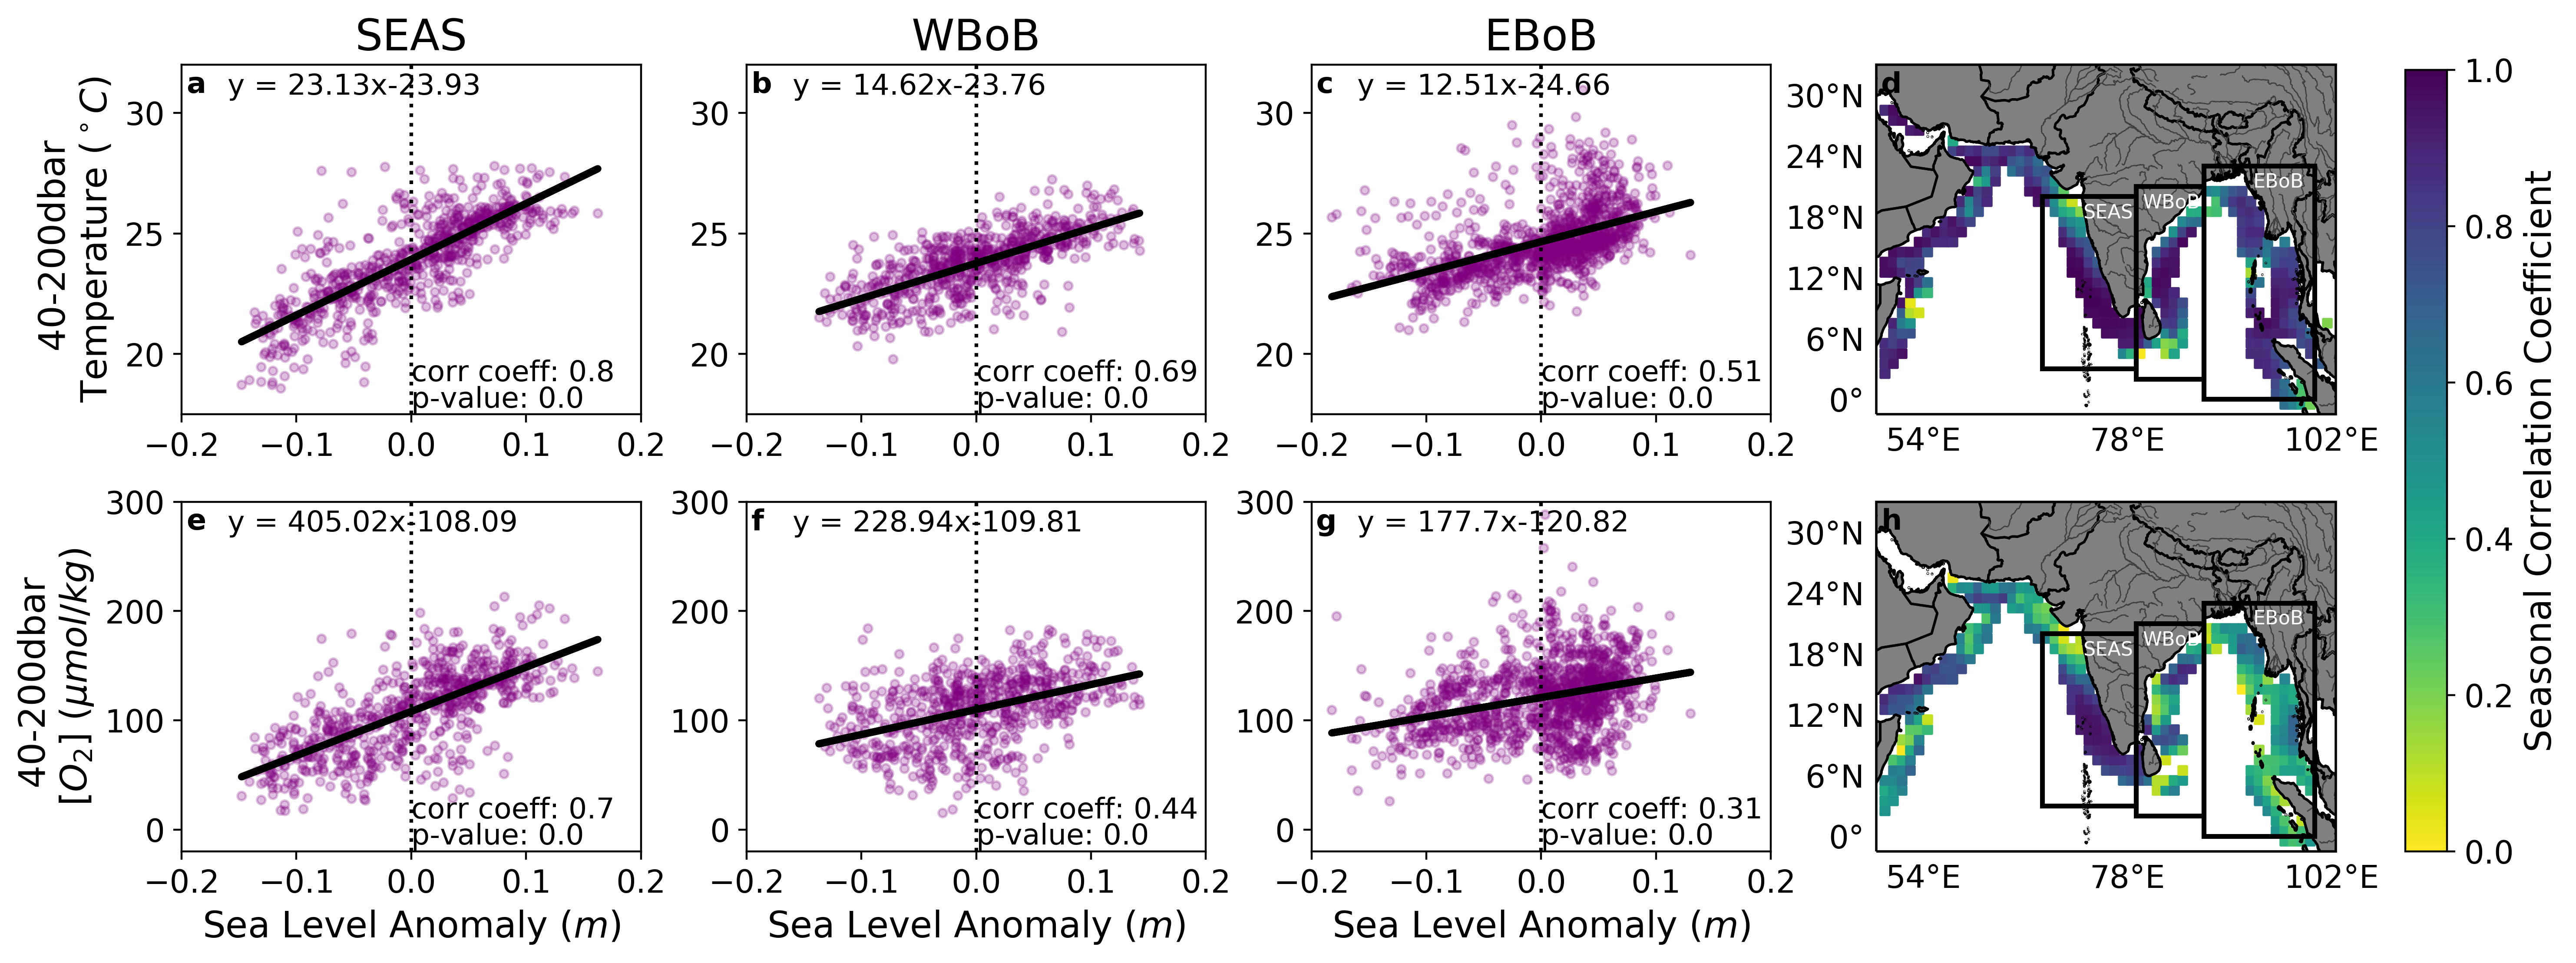

In [29]:
fig = plt.figure(figsize=(16,6),dpi=400)

sz = 12
sq_sz = 60
fsz = 12
alpha = 0.25

cmin = 0
cmax = 1

# cmap = get_continuous_cmap(['#034f84','#92a8d1','#b7d7e8','#f0f0f0','#f7cac9','#f7786b','#c94c4c'])
cmap = plt.cm.viridis_r

sp_clr = 'purple'
sat_clr = 'lightgrey'

params = {'legend.fontsize': 14,
         'axes.labelsize': 15,
         'axes.titlesize': 18,
         'xtick.labelsize':13,
         'ytick.labelsize':13}

pylab.rcParams.update(params)

##############################################################

xlim = [-0.2,0.2]
ylim = [17.5,32]

ax = fig.add_subplot(241)
p = ax.scatter(sla_AS,temp_AS,c = sp_clr,s= sz,alpha = alpha)
ax.axvline(x=0,color = 'k',linestyle = ':')
m, b, r, p_val,_ = stats.linregress(sla_AS,temp_AS)
ax.plot(sla_AS, m*sla_AS + b, 'k', linewidth = 3)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_title('SEAS')
ax.set_ylabel('40-200dbar \nTemperature ($^\circ C$)')
add_letter(ax, 'a', x = 0.01,y=0.92)
add_text(ax, 'y = ' + str(np.round(m,2)) + 'x-' + str(np.round(np.abs(b),2)), x = 0.1,y=0.915, fontsize = fsz)
add_text(ax, 'corr coeff: ' + str(np.round(r,2)), x = 0.5,y=0.095, fontsize = fsz)
add_text(ax, 'p-value: ' + str(np.round(p_val,4)), x = 0.5,y=0.02, fontsize = fsz)


ax = fig.add_subplot(242)
p = ax.scatter(sla_wBoB,temp_wBoB,c = sp_clr,s= sz,alpha = alpha)
ax.axvline(x=0,color = 'k',linestyle = ':')
m, b, r, p_val,_ =stats.linregress(sla_wBoB,temp_wBoB)
ax.plot(sla_wBoB, m*sla_wBoB + b, 'k', linewidth = 3)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_title('WBoB')
ax.tick_params(axis='x',labelbottom='off')
ax.tick_params(axis='y',labelbottom='off')
add_letter(ax, 'b', x = 0.01,y=0.92)
add_text(ax, 'y = ' + str(np.round(m,2)) + 'x-' + str(np.round(np.abs(b),2)), x = 0.1,y=0.915, fontsize = fsz)
add_text(ax, 'corr coeff: ' + str(np.round(r,2)), x = 0.5,y=0.095, fontsize = fsz)
add_text(ax, 'p-value: ' + str(np.round(p_val,4)), x = 0.5,y=0.02, fontsize = fsz)


ax = fig.add_subplot(243)
p = ax.scatter(sla_BoB,temp_BoB,c = sp_clr,s= sz,alpha = alpha)
ax.axvline(x=0,color = 'k',linestyle = ':')
m, b, r, p_val,_ =stats.linregress(sla_BoB,temp_BoB)
ax.plot(sla_BoB, m*sla_BoB + b, 'k', linewidth = 3)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_title('EBoB')
ax.tick_params(axis='x',labelbottom='off')
ax.tick_params(axis='y',labelbottom='off')
add_letter(ax, 'c', x = 0.01,y=0.92)
add_text(ax, 'y = ' + str(np.round(m,2)) + 'x-' + str(np.round(np.abs(b),2)), x = 0.1,y=0.915, fontsize = fsz)
add_text(ax, 'corr coeff: ' + str(np.round(r,2)), x = 0.5,y=0.095, fontsize = fsz)
add_text(ax, 'p-value: ' + str(np.round(p_val,4)), x = 0.5,y=0.02, fontsize = fsz)


ax = fig.add_subplot(244,projection= ccrs.PlateCarree())
var = r_value_sla_temp.flatten()[ds_WOA.coastal_mask]
rm_mask = var >= 0
p = ax.scatter(ds_WOA.coastal_mask_xx[rm_mask],ds_WOA.coastal_mask_yy[rm_mask],c = var[rm_mask],
           marker='s',s= sz,cmap=cmap,vmin=cmin,vmax=cmax,transform=ccrs.PlateCarree())
g = add_land(ax, countries = True, rivers = True)
g.xlocator = mticker.FixedLocator([54,78,102])
g.xlabel_style = {'size': 13}
g.ylabel_style = {'size': 13}
add_letter(ax, 'd', x = 0.01,y=0.92)
box_bounds = [bounds_AS,
         bounds_wBoB,
         bounds_BoB]  #lonmin,lonmax, latmin, latmax 
clrs = ['k','k','k']
add_box(ax,box_bounds,clrs)
add_text(ax, 'SEAS', x = 0.45,y=0.56, fontsize = 8, color = 'w')
add_text(ax, 'WBoB', x = 0.58,y=0.59, fontsize = 8, color = 'w')
add_text(ax, 'EBoB', x = 0.82,y=0.65, fontsize = 8, color = 'w')

# max and mins 
print('min temp/sla r val: ', np.nanmin(var[rm_mask]))
print('max temp/sla r val: ', np.nanmax(var[rm_mask]))

#-------------------------------------------------------------
xlim = [-0.2,0.2]
ylim = [-20,300]

ax = fig.add_subplot(245)
ax.scatter(sla_AS,doxy_AS,c = sp_clr,s= sz,alpha = alpha)
ax.axvline(x=0,color = 'k',linestyle = ':')
m, b, r, p_val,_ =stats.linregress(sla_AS, doxy_AS)
ax.plot(sla_AS, m*sla_AS + b, 'k', linewidth = 3)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_ylabel('40-200dbar \n[$O_2$] ($\mu mol/ kg$)')
ax.set_xlabel('Sea Level Anomaly ($m$)')
add_letter(ax, 'e', x = 0.01,y=0.92)
add_text(ax, 'y = ' + str(np.round(m,2)) + 'x-' + str(np.round(np.abs(b),2)), x = 0.1,y=0.915, fontsize = fsz)
add_text(ax, 'corr coeff: ' + str(np.round(r,2)), x = 0.5,y=0.095, fontsize = fsz)
add_text(ax, 'p-value: ' + str(np.round(p_val,4)), x = 0.5,y=0.02, fontsize = fsz)


ax = fig.add_subplot(246)
ax.scatter(sla_wBoB,doxy_wBoB,c = sp_clr,s= sz,alpha = alpha)
ax.axvline(x=0,color = 'k',linestyle = ':')
m, b, r, p_val,_ =stats.linregress(sla_wBoB, doxy_wBoB)
ax.plot(sla_wBoB, m*sla_wBoB + b, 'k', linewidth = 3)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_xlabel('Sea Level Anomaly ($m$)')
add_letter(ax, 'f', x = 0.01,y=0.92)
add_text(ax, 'y = ' + str(np.round(m,2)) + 'x-' + str(np.round(np.abs(b),2)), x = 0.1,y=0.915, fontsize = fsz)
add_text(ax, 'corr coeff: ' + str(np.round(r,2)), x = 0.5,y=0.095, fontsize = fsz)
add_text(ax, 'p-value: ' + str(np.round(p_val,4)), x = 0.5,y=0.02, fontsize = fsz)


ax = fig.add_subplot(247)
ax.scatter(sla_BoB,doxy_BoB,c = sp_clr,s= sz,alpha = alpha)
ax.axvline(x=0,color = 'k',linestyle = ':')
m, b, r, p_val,_ =stats.linregress(sla_BoB, doxy_BoB)
ax.plot(sla_BoB, m*sla_BoB + b, 'k', linewidth = 3)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_xlabel('Sea Level Anomaly ($m$)')
add_letter(ax, 'g', x = 0.01,y=0.92)
add_text(ax, 'y = ' + str(np.round(m,2)) + 'x-' + str(np.round(np.abs(b),2)), x = 0.1,y=0.915, fontsize = fsz)
add_text(ax, 'corr coeff: ' + str(np.round(r,2)), x = 0.5,y=0.095, fontsize = fsz)
add_text(ax, 'p-value: ' + str(np.round(p_val,4)), x = 0.5,y=0.02, fontsize = fsz)

ax = fig.add_subplot(248,projection= ccrs.PlateCarree())
var = r_value_sla_doxy.flatten()[ds_WOA.coastal_mask]
rm_mask = var >= 0
p = ax.scatter(ds_WOA.coastal_mask_xx[rm_mask],ds_WOA.coastal_mask_yy[rm_mask],c = var[rm_mask],
           marker='s',s= sz,cmap=cmap,vmin=cmin,vmax=cmax,transform=ccrs.PlateCarree())
g = add_land(ax, countries = True, rivers = True)
g.xlocator = mticker.FixedLocator([54,78,102])
g.xlabel_style = {'size': 13}
g.ylabel_style = {'size': 13}
add_letter(ax, 'h', x = 0.01,y=0.92)
box_bounds = [bounds_AS,
         bounds_wBoB,
         bounds_BoB]  #lonmin,lonmax, latmin, latmax 
clrs = ['k','k','k']
add_box(ax,box_bounds,clrs)
add_text(ax, 'SEAS', x = 0.45,y=0.56, fontsize = 8, color = 'w')
add_text(ax, 'WBoB', x = 0.58,y=0.59, fontsize = 8, color = 'w')
add_text(ax, 'EBoB', x = 0.82,y=0.65, fontsize = 8, color = 'w')


# max and mins 
print('min temp/doxy r val: ', np.nanmin(var[rm_mask]))
print('max temp/doxy r val: ', np.nanmax(var[rm_mask]))


plt.subplots_adjust(hspace = 0.25, wspace = 0.23)

add_single_vert_cbar(fig,p,'Seasonal Correlation Coefficient')

## Reproduction with 50-225dbar

In [30]:
#----------------- Arabian Sea ---------------------#

lat_slice_AS = slice(bounds_AS[2],bounds_AS[3]) 
lon_slice_AS = slice(bounds_AS[0],bounds_AS[1]) 

#subset gridded data
temp_AS = ds_WOA.temp_50_225.sel(lat = lat_slice_AS, lon = lon_slice_AS)
doxy_AS = ds_WOA.doxy_50_225.sel(lat = lat_slice_AS, lon = lon_slice_AS)
sla_AS = ds_SLA.mon_sla_mon_clim.sel(lat = lat_slice_AS, lon = lon_slice_AS)
    
# convert to coastal
xx,yy = np.meshgrid(np.array(temp_AS.lon),np.array(temp_AS.lat))
xx_AS = xx.flatten()
yy_AS = yy.flatten()

mask_AS = mask_coast(xx_AS,yy_AS,np.array(ds_WOA.coastal_mask_bounds))
temp_AS = temp_AS.stack(allpoints=['lat','lon'])[:,mask_AS]
doxy_AS = doxy_AS.stack(allpoints=['lat','lon'])[:,mask_AS]
sla_AS = sla_AS.stack(allpoints=['lat','lon'])[:,mask_AS]

mon_AS = np.full(temp_AS.shape,np.nan)
for tt in range(1,13):
    mon_AS[tt-1,:] = np.ones([1,temp_AS.shape[1]])*tt
    
temp_AS = np.array(temp_AS).flatten()
doxy_AS = np.array(doxy_AS).flatten()
sla_AS = np.array(sla_AS).flatten()
mon_AS = mon_AS.flatten()

sla_AS = sla_AS[~np.isnan(temp_AS)]
doxy_AS = doxy_AS[~np.isnan(temp_AS)]
mon_AS = mon_AS[~np.isnan(temp_AS)]
temp_AS = temp_AS[~np.isnan(temp_AS)]

#---------------- Western Bay of Bengal --------------------#

lat_slice_wBoB = slice(bounds_wBoB[2],bounds_wBoB[3])
lon_slice_wBoB = slice(bounds_wBoB[0],bounds_wBoB[1])

#subset gridded data
temp_wBoB = ds_WOA.temp_50_225.sel(lat = lat_slice_wBoB, lon = lon_slice_wBoB)
doxy_wBoB = ds_WOA.doxy_50_225.sel(lat = lat_slice_wBoB, lon = lon_slice_wBoB)
sla_wBoB = ds_SLA.mon_sla_mon_clim.sel(lat = lat_slice_wBoB, lon = lon_slice_wBoB)

# convert to coastal
xx,yy = np.meshgrid(np.array(temp_wBoB.lon),np.array(temp_wBoB.lat))
xx_wBoB = xx.flatten()
yy_wBoB = yy.flatten()

mask_wBoB = mask_coast(xx_wBoB,yy_wBoB,np.array(ds_WOA.coastal_mask_bounds))
temp_wBoB = temp_wBoB.stack(allpoints=['lat','lon'])[:,mask_wBoB]
doxy_wBoB = doxy_wBoB.stack(allpoints=['lat','lon'])[:,mask_wBoB]
sla_wBoB = sla_wBoB.stack(allpoints=['lat','lon'])[:,mask_wBoB]
xx_wBoB = xx_wBoB[mask_wBoB]
yy_wBoB = yy_wBoB[mask_wBoB]

mon_wBoB = np.full(temp_wBoB.shape,np.nan)
for tt in range(1,13):
    mon_wBoB[tt-1,:] = np.ones([1,temp_wBoB.shape[1]])*tt
    
temp_wBoB = np.array(temp_wBoB).flatten()
doxy_wBoB = np.array(doxy_wBoB).flatten()
sla_wBoB = np.array(sla_wBoB).flatten()
mon_wBoB = mon_wBoB.flatten()

sla_wBoB = sla_wBoB[~np.isnan(temp_wBoB)]
doxy_wBoB = doxy_wBoB[~np.isnan(temp_wBoB)]
mon_wBoB = mon_wBoB[~np.isnan(temp_wBoB)]
temp_wBoB = temp_wBoB[~np.isnan(temp_wBoB)]


#---------------- Bay of Bengal --------------------#

lat_slice_BoB = slice(bounds_BoB[2],bounds_BoB[3])
lon_slice_BoB = slice(bounds_BoB[0],bounds_BoB[1])

#subset gridded data
temp_BoB = ds_WOA.temp_50_225.sel(lat = lat_slice_BoB, lon = lon_slice_BoB)
doxy_BoB = ds_WOA.doxy_50_225.sel(lat = lat_slice_BoB, lon = lon_slice_BoB)
sla_BoB = ds_SLA.mon_sla_mon_clim.sel(lat = lat_slice_BoB, lon = lon_slice_BoB)

# convert to coastal
xx,yy = np.meshgrid(np.array(temp_BoB.lon),np.array(temp_BoB.lat))
xx_BoB = xx.flatten()
yy_BoB = yy.flatten()

mask_BoB = mask_coast(xx_BoB,yy_BoB,np.array(ds_WOA.coastal_mask_bounds))
temp_BoB = temp_BoB.stack(allpoints=['lat','lon'])[:,mask_BoB]
doxy_BoB = doxy_BoB.stack(allpoints=['lat','lon'])[:,mask_BoB]
sla_BoB = sla_BoB.stack(allpoints=['lat','lon'])[:,mask_BoB]
xx_BoB = xx_BoB[mask_BoB]
yy_BoB = yy_BoB[mask_BoB]

mon_BoB = np.full(temp_BoB.shape,np.nan)
seas_BoB = np.full(temp_BoB.shape,np.nan)
seas_clrs_BoB = np.full(temp_BoB.shape,np.nan)

for tt in range(1,13):
    
    mon_BoB[tt-1,:] = np.ones([1,temp_BoB.shape[1]])*tt
    
    if (tt == 6) | (tt == 7) | (tt == 8) | (tt == 9) | (tt == 10) | (tt == 11):
        seas_BoB[tt-1,:] = np.zeros([1,temp_BoB.shape[1]])
        
    elif (tt == 12) | (tt == 1) | (tt == 2) | (tt == 3) | (tt == 4) | (tt == 5):
        seas_BoB[tt-1,:] = np.ones([1,temp_BoB.shape[1]])
        
    
temp_BoB = np.array(temp_BoB).flatten()
doxy_BoB = np.array(doxy_BoB).flatten()
sla_BoB = np.array(sla_BoB).flatten()
mon_BoB = mon_BoB.flatten()
seas_BoB = seas_BoB.flatten()

sla_BoB = sla_BoB[~np.isnan(temp_BoB)]
doxy_BoB = doxy_BoB[~np.isnan(temp_BoB)]
mon_BoB = mon_BoB[~np.isnan(temp_BoB)]
seas_BoB = seas_BoB[~np.isnan(temp_BoB)]
temp_BoB = temp_BoB[~np.isnan(temp_BoB)]


slope_sla_temp, intercept_sla_temp, r_value_sla_temp, p_value_sla_temp,_ = seasonal_space_correlate(ds_SLA.mon_sla_mon_clim,
                                                                                                                   ds_WOA.temp_40_200)

slope_sla_doxy, intercept_sla_doxy, r_value_sla_doxy, p_value_sla_doxy,_ = seasonal_space_correlate(ds_SLA.mon_sla_mon_clim,
                                                                                                                    ds_WOA.doxy_40_200)

AttributeError: 'Dataset' object has no attribute 'temp_50_225'

In [ ]:
fig = plt.figure(figsize=(16,6),dpi=400)

sz = 12
sq_sz = 60
fsz = 12
alpha = 0.25

cmin = 0
cmax = 1

# cmap = get_continuous_cmap(['#034f84','#92a8d1','#b7d7e8','#f0f0f0','#f7cac9','#f7786b','#c94c4c'])
cmap = plt.cm.viridis_r

sp_clr = 'purple'
sat_clr = 'lightgrey'

params = {'legend.fontsize': 14,
         'axes.labelsize': 15,
         'axes.titlesize': 18,
         'xtick.labelsize':13,
         'ytick.labelsize':13}

pylab.rcParams.update(params)

##############################################################

xlim = [-0.2,0.2]
ylim = [17.5,32]

ax = fig.add_subplot(241)
p = ax.scatter(sla_AS,temp_AS,c = sp_clr,s= sz,alpha = alpha)
ax.axvline(x=0,color = 'k',linestyle = ':')
m, b, r, p_val,_ = stats.linregress(sla_AS,temp_AS)
ax.plot(sla_AS, m*sla_AS + b, 'k', linewidth = 3)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_title('SEAS')
ax.set_ylabel('50-225dbar \nTemperature ($^\circ C$)')
add_letter(ax, 'a', x = 0.01,y=0.92)
add_text(ax, 'y = ' + str(np.round(m,2)) + 'x-' + str(np.round(np.abs(b),2)), x = 0.1,y=0.915, fontsize = fsz)
add_text(ax, 'corr coeff: ' + str(np.round(r,2)), x = 0.5,y=0.095, fontsize = fsz)
add_text(ax, 'p-value: ' + str(np.round(p_val,4)), x = 0.5,y=0.02, fontsize = fsz)


ax = fig.add_subplot(242)
p = ax.scatter(sla_wBoB,temp_wBoB,c = sp_clr,s= sz,alpha = alpha)
ax.axvline(x=0,color = 'k',linestyle = ':')
m, b, r, p_val,_ =stats.linregress(sla_wBoB,temp_wBoB)
ax.plot(sla_wBoB, m*sla_wBoB + b, 'k', linewidth = 3)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_title('WBoB')
ax.tick_params(axis='x',labelbottom='off')
ax.tick_params(axis='y',labelbottom='off')
add_letter(ax, 'b', x = 0.01,y=0.92)
add_text(ax, 'y = ' + str(np.round(m,2)) + 'x-' + str(np.round(np.abs(b),2)), x = 0.1,y=0.915, fontsize = fsz)
add_text(ax, 'corr coeff: ' + str(np.round(r,2)), x = 0.5,y=0.095, fontsize = fsz)
add_text(ax, 'p-value: ' + str(np.round(p_val,4)), x = 0.5,y=0.02, fontsize = fsz)


ax = fig.add_subplot(243)
p = ax.scatter(sla_BoB,temp_BoB,c = sp_clr,s= sz,alpha = alpha)
ax.axvline(x=0,color = 'k',linestyle = ':')
m, b, r, p_val,_ =stats.linregress(sla_BoB,temp_BoB)
ax.plot(sla_BoB, m*sla_BoB + b, 'k', linewidth = 3)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_title('EBoB')
ax.tick_params(axis='x',labelbottom='off')
ax.tick_params(axis='y',labelbottom='off')
add_letter(ax, 'c', x = 0.01,y=0.92)
add_text(ax, 'y = ' + str(np.round(m,2)) + 'x-' + str(np.round(np.abs(b),2)), x = 0.1,y=0.915, fontsize = fsz)
add_text(ax, 'corr coeff: ' + str(np.round(r,2)), x = 0.5,y=0.095, fontsize = fsz)
add_text(ax, 'p-value: ' + str(np.round(p_val,4)), x = 0.5,y=0.02, fontsize = fsz)


ax = fig.add_subplot(244,projection= ccrs.PlateCarree())
var = r_value_sla_temp.flatten()[ds_WOA.coastal_mask]
rm_mask = var >= 0
p = ax.scatter(ds_WOA.coastal_mask_xx[rm_mask],ds_WOA.coastal_mask_yy[rm_mask],c = var[rm_mask],
           marker='s',s= sz,cmap=cmap,vmin=cmin,vmax=cmax,transform=ccrs.PlateCarree())
g = add_land(ax, countries = True, rivers = True)
g.xlocator = mticker.FixedLocator([54,78,102])
g.xlabel_style = {'size': 13}
g.ylabel_style = {'size': 13}
add_letter(ax, 'd', x = 0.01,y=0.92)
box_bounds = [bounds_AS,
         bounds_wBoB,
         bounds_BoB]  #lonmin,lonmax, latmin, latmax 
clrs = ['k','k','k']
add_box(ax,box_bounds,clrs)
add_text(ax, 'SEAS', x = 0.45,y=0.56, fontsize = 8, color = 'w')
add_text(ax, 'WBoB', x = 0.58,y=0.59, fontsize = 8, color = 'w')
add_text(ax, 'EBoB', x = 0.82,y=0.65, fontsize = 8, color = 'w')

# max and mins 
print('min temp/sla r val: ', np.nanmin(var[rm_mask]))
print('max temp/sla r val: ', np.nanmax(var[rm_mask]))

#-------------------------------------------------------------
xlim = [-0.2,0.2]
ylim = [-20,300]

ax = fig.add_subplot(245)
ax.scatter(sla_AS,doxy_AS,c = sp_clr,s= sz,alpha = alpha)
ax.axvline(x=0,color = 'k',linestyle = ':')
m, b, r, p_val,_ =stats.linregress(sla_AS, doxy_AS)
ax.plot(sla_AS, m*sla_AS + b, 'k', linewidth = 3)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_ylabel('50-225dbar \n[$O_2$] ($\mu mol/ kg$)')
ax.set_xlabel('Sea Level Anomaly ($m$)')
add_letter(ax, 'e', x = 0.01,y=0.92)
add_text(ax, 'y = ' + str(np.round(m,2)) + 'x-' + str(np.round(np.abs(b),2)), x = 0.1,y=0.915, fontsize = fsz)
add_text(ax, 'corr coeff: ' + str(np.round(r,2)), x = 0.5,y=0.095, fontsize = fsz)
add_text(ax, 'p-value: ' + str(np.round(p_val,4)), x = 0.5,y=0.02, fontsize = fsz)


ax = fig.add_subplot(246)
ax.scatter(sla_wBoB,doxy_wBoB,c = sp_clr,s= sz,alpha = alpha)
ax.axvline(x=0,color = 'k',linestyle = ':')
m, b, r, p_val,_ =stats.linregress(sla_wBoB, doxy_wBoB)
ax.plot(sla_wBoB, m*sla_wBoB + b, 'k', linewidth = 3)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_xlabel('Sea Level Anomaly ($m$)')
add_letter(ax, 'f', x = 0.01,y=0.92)
add_text(ax, 'y = ' + str(np.round(m,2)) + 'x-' + str(np.round(np.abs(b),2)), x = 0.1,y=0.915, fontsize = fsz)
add_text(ax, 'corr coeff: ' + str(np.round(r,2)), x = 0.5,y=0.095, fontsize = fsz)
add_text(ax, 'p-value: ' + str(np.round(p_val,4)), x = 0.5,y=0.02, fontsize = fsz)


ax = fig.add_subplot(247)
ax.scatter(sla_BoB,doxy_BoB,c = sp_clr,s= sz,alpha = alpha)
ax.axvline(x=0,color = 'k',linestyle = ':')
m, b, r, p_val,_ =stats.linregress(sla_BoB, doxy_BoB)
ax.plot(sla_BoB, m*sla_BoB + b, 'k', linewidth = 3)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_xlabel('Sea Level Anomaly ($m$)')
add_letter(ax, 'g', x = 0.01,y=0.92)
add_text(ax, 'y = ' + str(np.round(m,2)) + 'x-' + str(np.round(np.abs(b),2)), x = 0.1,y=0.915, fontsize = fsz)
add_text(ax, 'corr coeff: ' + str(np.round(r,2)), x = 0.5,y=0.095, fontsize = fsz)
add_text(ax, 'p-value: ' + str(np.round(p_val,4)), x = 0.5,y=0.02, fontsize = fsz)

ax = fig.add_subplot(248,projection= ccrs.PlateCarree())
var = r_value_sla_doxy.flatten()[ds_WOA.coastal_mask]
rm_mask = var >= 0
p = ax.scatter(ds_WOA.coastal_mask_xx[rm_mask],ds_WOA.coastal_mask_yy[rm_mask],c = var[rm_mask],
           marker='s',s= sz,cmap=cmap,vmin=cmin,vmax=cmax,transform=ccrs.PlateCarree())
g = add_land(ax, countries = True, rivers = True)
g.xlocator = mticker.FixedLocator([54,78,102])
g.xlabel_style = {'size': 13}
g.ylabel_style = {'size': 13}
add_letter(ax, 'h', x = 0.01,y=0.92)
box_bounds = [bounds_AS,
         bounds_wBoB,
         bounds_BoB]  #lonmin,lonmax, latmin, latmax 
clrs = ['k','k','k']
add_box(ax,box_bounds,clrs)
add_text(ax, 'SEAS', x = 0.45,y=0.56, fontsize = 8, color = 'w')
add_text(ax, 'WBoB', x = 0.58,y=0.59, fontsize = 8, color = 'w')
add_text(ax, 'EBoB', x = 0.82,y=0.65, fontsize = 8, color = 'w')


# max and mins 
print('min temp/doxy r val: ', np.nanmin(var[rm_mask]))
print('max temp/doxy r val: ', np.nanmax(var[rm_mask]))


plt.subplots_adjust(hspace = 0.25, wspace = 0.23)

add_single_vert_cbar(fig,p,'Seasonal Correlation Coefficient')

## Reproduction with WOA13
